<center><h1>Detected Exoplanets</center>

| Name | Input Catalog | Orbital Period (days)| Planet Radius (Earth) | Semi-major Axis | Inclination |
| :- | :- | -: | -: |-: | -: |
| Wasp-69b | TIC 248853232 | 3.87 | 12.53 |   |   |
| TOI-270b | TIC 259377017 | 3.36 | 1.43 |   |   |
| TOI-270c | TIC 259377017 | 5.66 | 2.48 |   |   |
| TOI-270d | TIC 259377017 | 11.38 | 2.23 |   |   |
| GJ 3470b | TIC 19028197 | 3.34 | 4.38 |   |   |
| TRES-2b | KIC 11446443 | 2.47 | 13.25 |   |   |
| Kepler-95b | KIC 8349582 | 2.47 | 13.25 |   |   |


<center>gas giant > 6 R🜨 > neptune like > 4 R🜨 > sub neptune > 2 R🜨 > super earth > 1.5 R🜨 > terrestrial</center>

In [1]:
%matplotlib widget
import statistics
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np
from scipy import stats
from astropy import units as u
from astropy import constants as const
from astroquery.mast import Catalogs

In [2]:
input_catalog = input("input catalog: ")
split = input_catalog.split(" ")
telescope = split[0]

input catalog:  TIC 259377017


In [3]:
def import_tess(input_catalog, author):    
    all_data = lk.search_lightcurve(input_catalog, author = author, exptime = "short")
    print("all data:")
    print(all_data)
    
    sectors_list = []
    for sector in all_data.table:
        sectors_list.append(int(sector["sequence_number"]))

    all_years = []
    for each in all_data:
        all_years.append(each.year.item())
    yr_max_i = np.max(range(len(all_years)))
    yr_max = (all_years[yr_max_i])
    yr_min = (all_years[0])
    yr_range = yr_max - yr_min

    if yr_range > 5:
        yr_count = np.bincount(all_years)
        yr_mode = np.argmax(yr_count)
        yr_median = np.median(all_years)

        if np.max(yr_count) > 5:
            year_mask = (all_data.table["year"] >= yr_mode - 1) & (all_data.table["year"] <= yr_mode + 1)
        else:
            year_mask = (all_data.table["year"] >= yr_median - 1) & (all_data.table["year"] <= yr_median + 1)
                
        selected_data = all_data[year_mask]
        stitch_me = lk.search_lightcurve(input_catalog, author = author, exptime = "short", sector = sectors_list)[year_mask].download_all()
    else:
        selected_data = lk.search_lightcurve(input_catalog, author = author, exptime = "short", limit = 5)
        stitch_me = lk.search_lightcurve(input_catalog, author = author, exptime = "short", sector = sectors_list).download_all()
        
    print("\nselected data:")
    print(selected_data)        
    return all_data, sectors_list, selected_data, stitch_me

def import_kepler(input_catalog, author):    
    all_data = lk.search_lightcurve(input_catalog, author = author, exptime = "short")
    print("all data:")
    print(all_data)
    
    quarters_list = []
    for quarter in all_data.table:
        quarters_list.append(int(quarter["mission"].split(" ")[2]))

    all_years = []
    for each in all_data:
        all_years.append(each.year.item())
    yr_max_i = np.max(range(len(all_years)))
    yr_max = (all_years[yr_max_i])
    yr_min = (all_years[0])
    yr_range = yr_max - yr_min

    if yr_range > 5:
        yr_count = np.bincount(all_years)
        yr_mode = np.argmax(yr_count)
        yr_median = np.median(all_years)

        if np.max(yr_count) > 5:
            year_mask = (all_data.table["year"] >= yr_mode - 1) & (all_data.table["year"] <= yr_mode + 1)
        else:
            year_mask = (all_data.table["year"] >= yr_median - 1) & (all_data.table["year"] <= yr_median + 1)
                
        selected_data = all_data[year_mask]
        stitch_me = lk.search_lightcurve(input_catalog, author = author, exptime = "short", quarter = quarters_list)[year_mask].download_all()
    else:
        selected_data = lk.search_lightcurve(input_catalog, author = author, exptime = "short", limit = 5)
        stitch_me = lk.search_lightcurve(input_catalog, author = author, exptime = "short", quarter = quarters_list).download_all()
        
    print("\nselected data:")
    print(selected_data)
    return all_data, quarters_list, selected_data, stitch_me

if telescope == "TIC":
    author = "SPOC"
    all_data, sectors, selected_data, stitch_me = import_tess(input_catalog, author)
if telescope == "KIC":
    author = "Kepler"
    all_data, quarters, selected_data, stitch_me = import_kepler(input_catalog, author)

all data:
SearchResult containing 6 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 03 2018   SPOC     120   259377017      0.0
  1 TESS Sector 04 2018   SPOC     120   259377017      0.0
  2 TESS Sector 05 2018   SPOC     120   259377017      0.0
  3 TESS Sector 30 2020   SPOC     120   259377017      0.0
  4 TESS Sector 32 2020   SPOC     120   259377017      0.0
  5 TESS Sector 97 2025   SPOC     120   259377017      0.0



selected data:
SearchResult containing 5 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 03 2018   SPOC     120   259377017      0.0
  1 TESS Sector 04 2018   SPOC     120   259377017      0.0
  2 TESS Sector 05 2018   SPOC     120   259377017      0.0
  3 TESS Sector 30 2020   SPOC     120   259377017      0.0
  4 TESS Sector 32 2020   SPOC     120   259377017      0.0


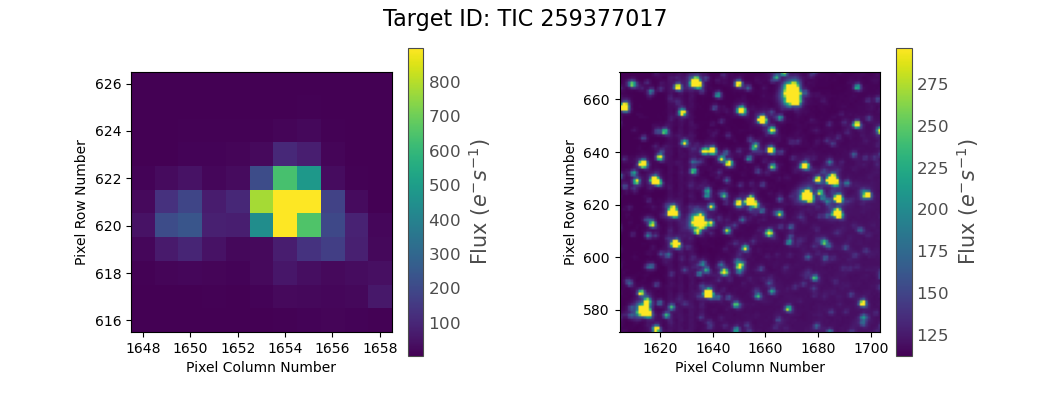

In [4]:
if telescope == "TIC":
    fig, (ax1, ax2) = plt.subplots(nrows = 1 ,ncols = 2, figsize = (10.5, 4))
    fig.suptitle(f"Target ID: {input_catalog}", fontsize = 16)
    fig.subplots_adjust(wspace = .5)
    
    px_file = lk.search_targetpixelfile(input_catalog, author = author, exptime = "short", sector = sectors[0]).download()
    px_file.plot(ax = ax1, title = "")
    
    ff_file = lk.search_tesscut(input_catalog, sector = sectors[0]).download(cutout_size = 99)
    ff_file.plot(ax = ax2, title = "")
    
if telescope == "KIC":
    px_file = lk.search_targetpixelfile(input_catalog, author = author, exptime = "short", quarter = quarters[0]).download()
    px_file.plot()
    plt.title(f"Target ID: {input_catalog}", fontsize = 16)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

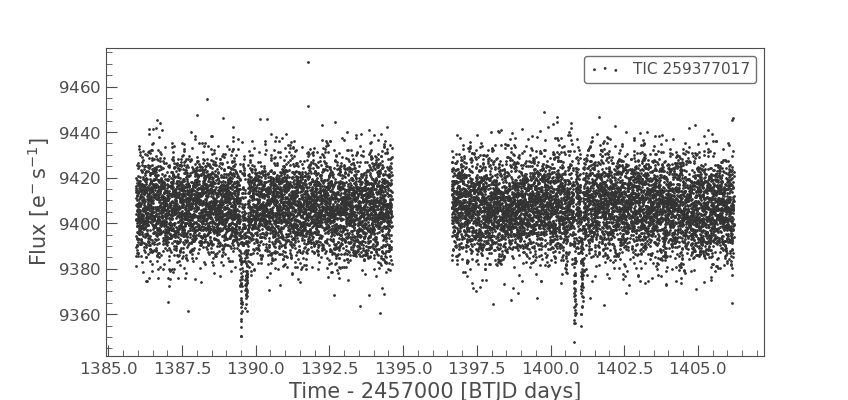

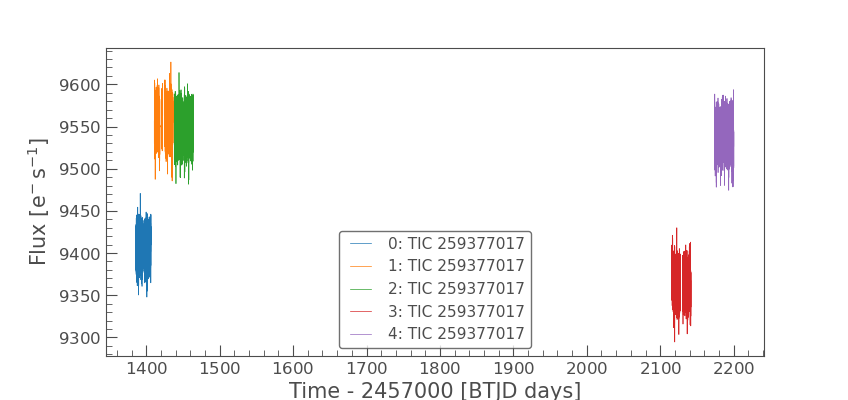

In [5]:
if telescope == "TIC":
    ts_first = lk.search_lightcurve(input_catalog, author = author, exptime = "short", sector = sectors[0], limit = 1).download()
    if len(sectors) > 1:
        bls_me = stitch_me.stitch().remove_nans().flatten()
    else:
        ts_first.scatter()
        bls_me = ts_first.remove_nans().flatten()

if telescope == "KIC":
    ts_first = lk.search_lightcurve(input_catalog, author = author, exptime = "short", quarter = quarters[0], limit = 1).download()
    if len(quarters) > 1:
        bls_me = stitch_me.stitch().remove_nans().flatten()
    else:
        ts_first.scatter()
        bls_me = ts_first.remove_nans().flatten()

ts_first.scatter()
stitch_me.plot()

candidate 1 orbital period: 5.6606 days
candidate 2 orbital period: 11.3795 days
candidate 3 orbital period: 3.3601 days


`period` contains 317437 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


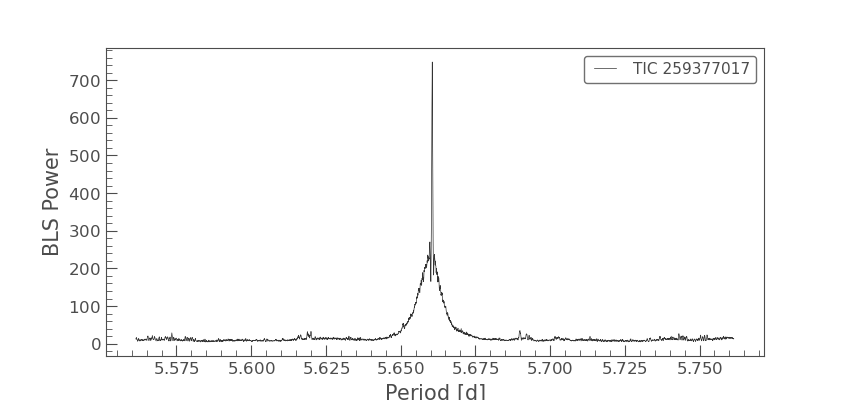

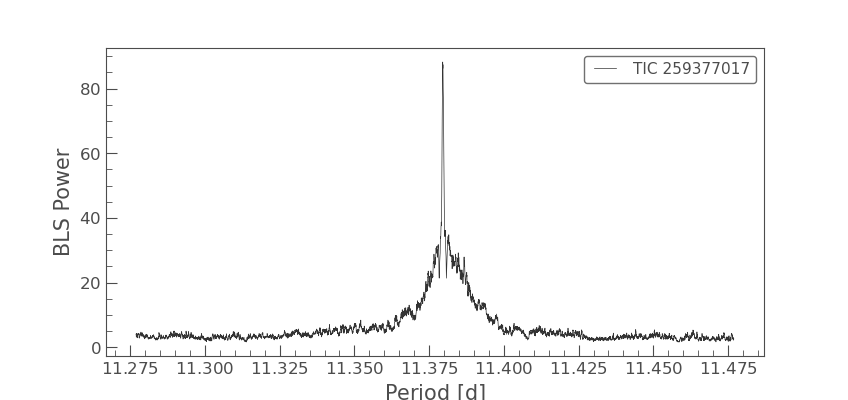

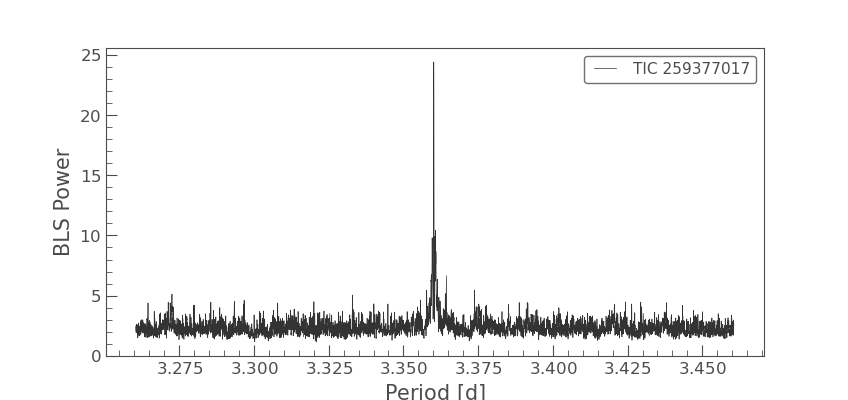

In [6]:
def initial_periodogram(bls_me, exclusions, i):
    search_duration = np.linspace(.05, .3, 10)
    search_period = np.logspace(np.log10(1), np.log10(14), 5000) 
    periodogram = bls_me.to_periodogram(method = "bls", period = search_period, duration = search_duration, frequency_factor = 500)
    orbital_period = periodogram.period_at_max_power
    transit_time = periodogram.transit_time_at_max_power
    transit_duration = periodogram.duration_at_max_power  
    return periodogram, orbital_period, transit_time, transit_duration
    
def refine_periodogram(prev_bls_me, prev_period, prev_duration):
    duration = np.linspace(prev_duration.value - .01, prev_duration.value + .01, 10) 
    period = np.linspace(prev_period.value - .1, prev_period.value + .1, 5000)
    final_periodogram = prev_bls_me.to_periodogram(method = "bls", period = period, duration = duration)
    final_period = final_periodogram.period_at_max_power
    final_time = final_periodogram.transit_time_at_max_power
    final_duration = final_periodogram.duration_at_max_power
    return final_periodogram, final_period, final_time, final_duration
    
def detect_transit(prev_bls_me, prev_period, prev_time, prev_duration, periods):
    phased_lc = prev_bls_me.fold(period = prev_period, epoch_time = prev_time)
    transit_event = np.logical_and(phased_lc.phase > (-prev_duration/2), phased_lc.phase < (prev_duration/2))
    in_transit = np.median(phased_lc.flux[transit_event])
    out_transit = np.mean(phased_lc.flux[~transit_event])
    depth = out_transit - in_transit
    sigma = np.std(phased_lc.flux[~transit_event])*.2
    snr = depth/sigma
    
    if len(periods) > 1:
        i = 1
        while i < len(periods):
            multiple = periods[i]/periods[i-1]
            harmonics_test = round(multiple, 2) == round(multiple)
            i += 1
    else:
        harmonics_test = False
    
    if snr > 1 and harmonics_test == False:
        detected_transit = True
    else:
        detected_transit = False
    return detected_transit, phased_lc

def next_function(prev_bls_me, prev_periodogram, prev_period, prev_time, prev_duration):
    mask = prev_periodogram.get_transit_mask(period = prev_period, transit_time = prev_time, duration = prev_duration)
    next_bls_me = prev_bls_me[~mask]
    exclude = (prev_periodogram.period < prev_period * .95) | (prev_periodogram.period > prev_period * 1.05) 
    prev_periodogram.power[~exclude] = 0
    return next_bls_me, exclude

candidates = [bls_me]
exclusions = []
exoplanets = []
potential_periods = []
periods = []
transit_times = []
durations = []

i = 0
potential_candidate = True
while potential_candidate:
    periodogram, orbital_period, transit_time, transit_duration = initial_periodogram(candidates[i], exclusions, i) 
    final_periodogram, final_period, final_time, final_duration = refine_periodogram(candidates[i], orbital_period, transit_duration)
    potential_periods.append(final_period.value)
    detected_transit, phased_lc = detect_transit(candidates[i], final_period, final_time, final_duration, potential_periods)
    
    if detected_transit == True:
        print(f"candidate {i + 1} orbital period: {round(final_period.value, 4)} days")
        final_periodogram.plot()
        exoplanets.append({"period": final_period, "t0": final_time, "duration": final_duration})  
        periods.append(final_period.value)
        transit_times.append(final_time.value)
        durations.append(final_duration.value)

        next_fold_me, exclude = next_function(candidates[i], final_periodogram, final_period, final_time, final_duration)
        candidates.append(next_fold_me)
        exclusions.append(exclude)  
    
        potential_candidate = True
    else:
        potential_candidate = False
    i += 1

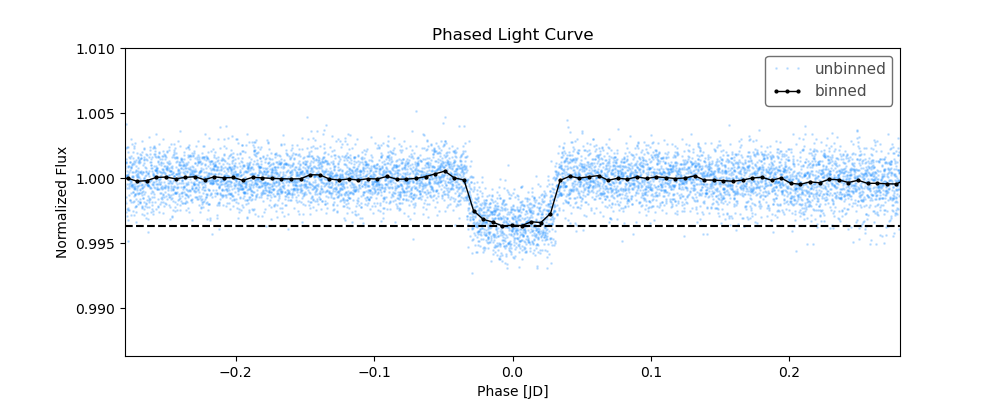

Radius:
2.4803 earthRad
0.2213 jupiterRad


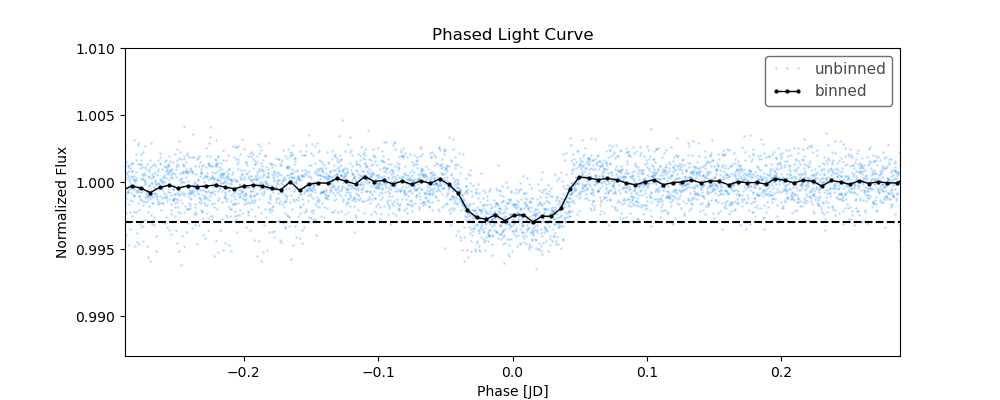

Radius:
2.2268 earthRad
0.1987 jupiterRad


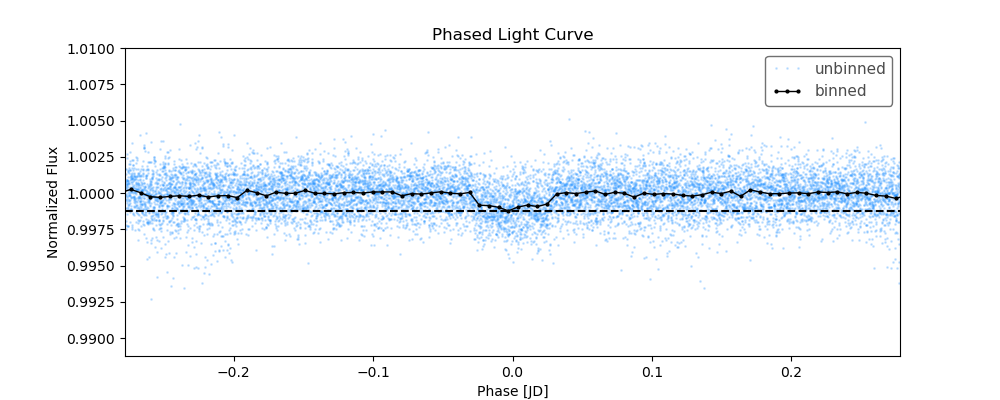

Radius:
1.4275 earthRad
0.1274 jupiterRad


In [7]:
def clean_data(mission, bls_me):
    transit_mask = bls_me.create_transit_mask(
                period = periods, 
                transit_time = transit_times, 
                duration = durations
            )
    if len(mission) > 1:
        fold_me = stitch_me.stitch().remove_nans().flatten(mask = transit_mask)
    else:
        fold_me = ts_first.remove_nans().flatten(mask = transit_mask)
    return fold_me

def plot_light_curve(fold_me, period, t0, duration):
    phased_lc = fold_me.fold(period = period, epoch_time = t0)
    binned_lc = phased_lc.bin(10/60/24)
    dip = binned_lc.flux.value.min()
    depth = 1 - dip
    half_duration = duration.value/2
    fig, ax = plt.subplots(figsize = (10,4))
    phased_lc.plot(ax = ax, linewidth = '0', marker = ".", color = "dodgerblue", alpha = .2, label = "unbinned")
    binned_lc.plot(ax = ax, linewidth = '1', marker = 'o', color = "black", label = "binned")
    plt.axhline(dip, color = 'black', linestyle = '--')
    plt.title("Phased Light Curve")
    plt.xlim(-(half_duration + .25), (half_duration + .25))
    plt.ylim(dip - .01, 1.01)
    plt.show()
    return depth

def find_radius(input_catalog, depth):
    star = Catalogs.query_object(input_catalog, catalog = "TIC")
    exo_sun_rad = np.sqrt(depth) * (star["rad"][0] * u.R_sun)
    exo_earth_rad = exo_sun_rad.to(u.Rearth) 
    exo_jupiter_rad = exo_sun_rad.to(u.Rjupiter) 
    print('Radius:')
    print(round(exo_earth_rad, 4))
    print(round(exo_jupiter_rad, 4))
    return exo_earth_rad

if telescope == "TIC":
    fold_me = clean_data(sectors, bls_me)
if telescope == "KIC":
    fold_me = clean_data(quarters, bls_me)
    
for each in exoplanets:
    depth = plot_light_curve(fold_me, each["period"], each["t0"], each["duration"])
    each["depth"] = depth
    try:
        radius = find_radius(input_catalog, depth)
        each["radius"] = radius
    except:
        print("MAST import error: try again to calculate radius")

#### Ideas for improvement
- test false positives
- compare results with exoplanet archive
- refine radius calculations for small planets
- semi-major axis
- inclination